In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, accuracy_score, r2_score, mean_squared_error
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
# Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from xgboost import XGBRegressor

from sklearn.svm import SVR

# impot pipeline
from sklearn.pipeline import Pipeline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv(r'/content/train (1).csv')


In [3]:
train.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [4]:
print(train.shape)

(1460, 81)


In [5]:
test=pd.read_csv(r"/content/train (1).csv")

In [6]:
print(train.shape)

(1460, 81)


In [7]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
 df = pd.concat((train,test))

In [9]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [10]:
df.shape

(2920, 81)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

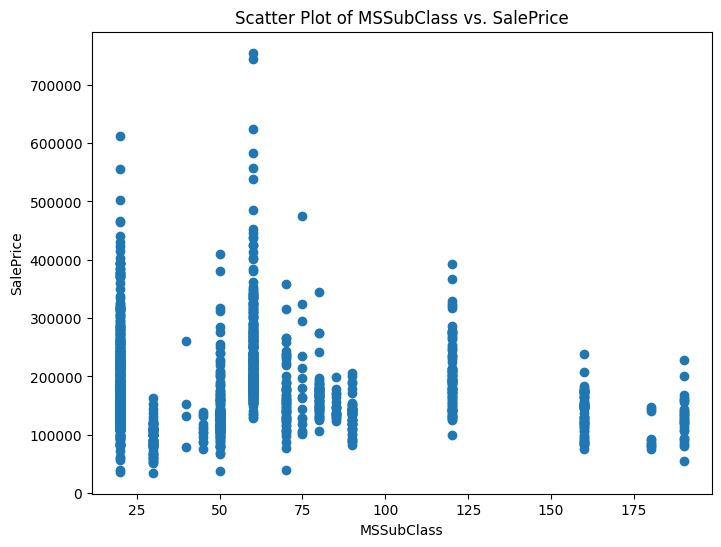

In [12]:
# prompt: make scatterplot MSSubClass and SalePrice

plt.figure(figsize=(8, 6))
plt.scatter(train['MSSubClass'], train['SalePrice'])
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Scatter Plot of MSSubClass vs. SalePrice')
plt.show()


In [13]:
df["SalePrice"].describe()

,SalePrice
count,2920.000000
mean,180921.195890
std,79428.893889
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


In [14]:
df["SaleCondition"].describe()

,SaleCondition
count,2920
unique,6
top,Normal
freq,2396


In [15]:
df["MSZoning"].describe()

,MSZoning
count,2920
unique,5
top,RL
freq,2302


In [16]:
#lets check the saleprice distributuion
#distplot using pyplot
import plotly.express as px
fig = px.histogram(df, x="SalePrice", nbins=50)
fig.show()

In [17]:
import plotly.express as px

# Example: Aggregating SalePrice
agg_data = df['SalePrice'].value_counts().reset_index()
agg_data.columns = ['SalePrice', 'Count']

fig = px.bar(agg_data, x='SalePrice', y='Count')
fig.show()


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [20]:
df_backup = df.copy()


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2920 non-null   int64  
 1   MSSubClass     2920 non-null   int64  
 2   MSZoning       2920 non-null   object 
 3   LotFrontage    2402 non-null   float64
 4   LotArea        2920 non-null   int64  
 5   Street         2920 non-null   object 
 6   Alley          182 non-null    object 
 7   LotShape       2920 non-null   object 
 8   LandContour    2920 non-null   object 
 9   Utilities      2920 non-null   object 
 10  LotConfig      2920 non-null   object 
 11  LandSlope      2920 non-null   object 
 12  Neighborhood   2920 non-null   object 
 13  Condition1     2920 non-null   object 
 14  Condition2     2920 non-null   object 
 15  BldgType       2920 non-null   object 
 16  HouseStyle     2920 non-null   object 
 17  OverallQual    2920 non-null   int64  
 18  OverallCond  

In [22]:
df.drop("Id", axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   Alley          182 non-null    object 
 6   LotShape       2920 non-null   object 
 7   LandContour    2920 non-null   object 
 8   Utilities      2920 non-null   object 
 9   LotConfig      2920 non-null   object 
 10  LandSlope      2920 non-null   object 
 11  Neighborhood   2920 non-null   object 
 12  Condition1     2920 non-null   object 
 13  Condition2     2920 non-null   object 
 14  BldgType       2920 non-null   object 
 15  HouseStyle     2920 non-null   object 
 16  OverallQual    2920 non-null   int64  
 17  OverallCond    2920 non-null   int64  
 18  YearBuilt    

In [24]:
# display the variables with more than 0 null values using forloop
null_cols = []
for col in df.columns:
    if df[col].isnull().sum() > 0 :
        print("Column",col, "has", df[col].isnull().sum(),"null values")
        null_cols.append(col)

Column LotFrontage has 518 null values
Column Alley has 2738 null values
Column MasVnrType has 1744 null values
Column MasVnrArea has 16 null values
Column BsmtQual has 74 null values
Column BsmtCond has 74 null values
Column BsmtExposure has 76 null values
Column BsmtFinType1 has 74 null values
Column BsmtFinType2 has 76 null values
Column Electrical has 2 null values
Column FireplaceQu has 1380 null values
Column GarageType has 162 null values
Column GarageYrBlt has 162 null values
Column GarageFinish has 162 null values
Column GarageQual has 162 null values
Column GarageCond has 162 null values
Column PoolQC has 2906 null values
Column Fence has 2358 null values
Column MiscFeature has 2812 null values


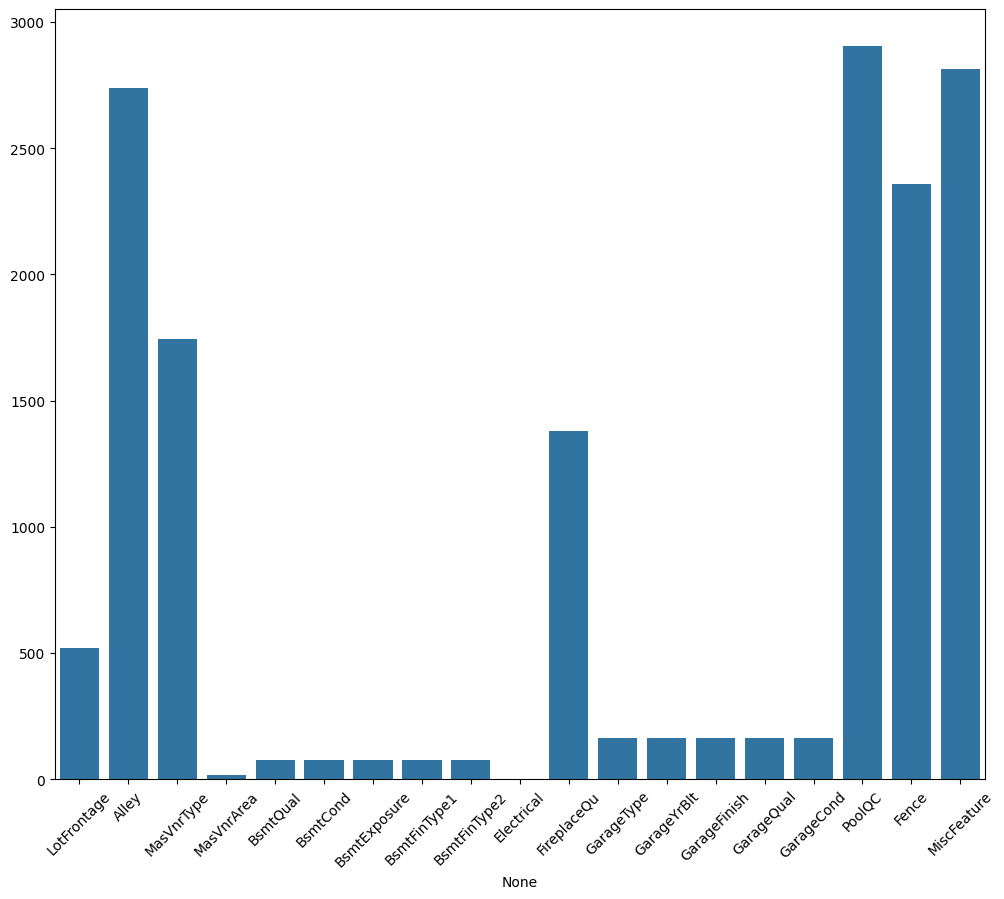

In [25]:
# lets visualize the null vaues
# using bar plot
# plt.figure(figsize=(12,10))
# sns.barplot(x=df[null_cols].isnull().sum().index, y=df[null_cols].isnull().sum().values)
# xticks(rotation=45)
# plt.show()
plt.figure(figsize=(12, 10))

# Create the barplot
sns.barplot(
    x=df[null_cols].isnull().sum().index,
    y=df[null_cols].isnull().sum().values
)

# Adjust the x-axis labels
plt.xticks(rotation=45)

# Display the plot
plt.show()

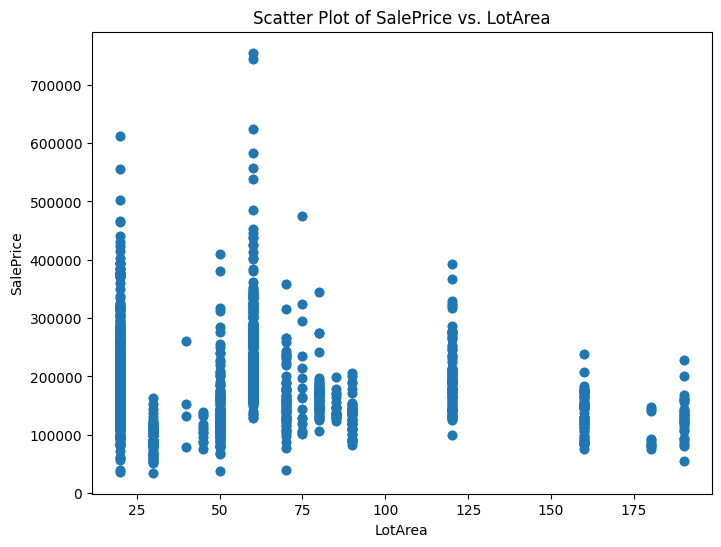

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(df['MSSubClass'], df['SalePrice'])  # Replace with your column names
plt.xlabel('LotArea')  # Replace with your x-axis label
plt.ylabel('SalePrice')  # Replace with your y-axis label
plt.title('Scatter Plot of SalePrice vs. LotArea')  # Replace with your title
plt.show()

In [27]:
df = df.loc[:, df.nunique() > 1]


In [31]:
import numpy as np
import pandas as pd

# ... (your previous code) ...

# Get list of numerical features
numerical_features = df.select_dtypes(include=np.number).columns.tolist()

# Calculate correlation matrix only for numerical features
corr_matrix = df[numerical_features].corr().abs()

# Find highly correlated columns (e.g., above 0.9)
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]

# Drop correlated columns
df = df.drop(to_drop, axis=1)

In [35]:
# Check for missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
print(missing_data[missing_data > 0])


PoolQC          2906
MiscFeature     2812
Alley           2738
Fence           2358
MasVnrType      1744
FireplaceQu     1380
LotFrontage      518
GarageQual       162
GarageType       162
GarageFinish     162
GarageCond       162
GarageYrBlt      162
BsmtExposure      76
BsmtFinType2      76
BsmtQual          74
BsmtFinType1      74
BsmtCond          74
MasVnrArea        16
Electrical         2
dtype: int64


In [36]:
# Drop columns with more than 60% missing values
threshold = 0.6 * len(df)
df = df.dropna(axis=1, thresh=threshold)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2920 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2920 non-null   int64  
 1   MSZoning       2920 non-null   object 
 2   LotFrontage    2402 non-null   float64
 3   LotArea        2920 non-null   int64  
 4   Street         2920 non-null   object 
 5   LotShape       2920 non-null   object 
 6   LandContour    2920 non-null   object 
 7   Utilities      2920 non-null   object 
 8   LotConfig      2920 non-null   object 
 9   LandSlope      2920 non-null   object 
 10  Neighborhood   2920 non-null   object 
 11  Condition1     2920 non-null   object 
 12  Condition2     2920 non-null   object 
 13  BldgType       2920 non-null   object 
 14  HouseStyle     2920 non-null   object 
 15  OverallQual    2920 non-null   int64  
 16  OverallCond    2920 non-null   int64  
 17  YearBuilt      2920 non-null   int64  
 18  YearRemodAdd 

In [38]:
# plot Scatter plot usig plotly
import plotly.express as px
fig = px.scatter(df, x="LotArea", y="SalePrice")
fig.show()

In [39]:
# missimg value imputation
df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,518
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


In [40]:
# miissing value percentage
df.isnull().sum()/df.shape[0]*100

,0
MSSubClass,0.000000
MSZoning,0.000000
LotFrontage,17.739726
LotArea,0.000000
Street,0.000000
...,...
MoSold,0.000000
YrSold,0.000000
SaleType,0.000000
SaleCondition,0.000000


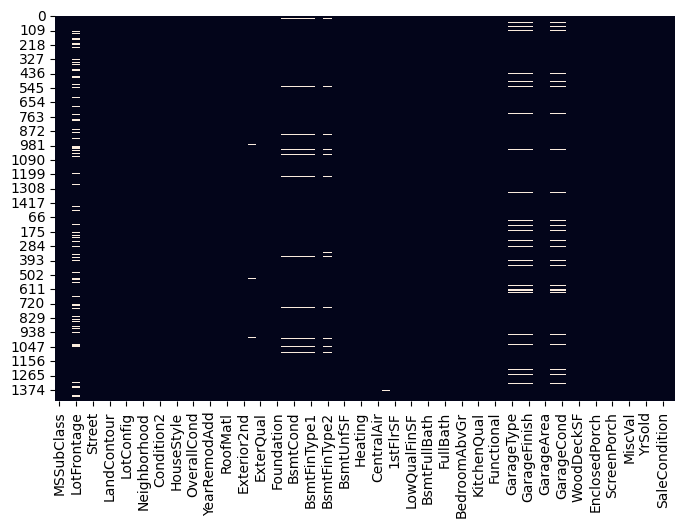

In [41]:
# Visualize the data
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [42]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['LotFrontage',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [43]:
# Selecting only numerical columns with missing values
numerical_missing_columns = df.select_dtypes(include=['float', 'int']).columns[
    df.select_dtypes(include=['float', 'int']).isnull().any()
]

In [44]:
numerical_missing_columns

Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')

In [45]:
# Selecting only categorical columns with missing values
Cat_missing_columns = df.select_dtypes(include=['object']).columns[
    df.select_dtypes(include=['object']).isnull().any()
]

# Display the selected column names
print("Categorical columns with missing values:", Cat_missing_columns.tolist())

Categorical columns with missing values: ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']


In [46]:
# Define bool_cols as columns with boolean data types
bool_cols = df.select_dtypes(include=['bool']).columns.tolist()

# Check if there are any boolean columns
if not bool_cols:
    print("No boolean columns found in the dataset.")
else:
    print("Boolean columns in the dataset:", bool_cols)

No boolean columns found in the dataset.


In [47]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
LotFrontage,518
GarageYrBlt,162
GarageFinish,162
GarageQual,162
GarageType,162
GarageCond,162
BsmtFinType2,76
BsmtExposure,76
BsmtQual,74
BsmtFinType1,74


In [49]:
def impute_continuous_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    label_encoder = LabelEncoder()
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = label_encoder.fit_transform(X[col])

    rf_regressor = RandomForestRegressor(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print(f"MAE for {passed_col}: {mean_absolute_error(y_test, y_pred):.2f}")
    # Use np.sqrt if using scikit-learn < 1.2, otherwise keep squared=False
    print(f"RMSE for {passed_col}: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R2 Score for {passed_col}: {r2_score(y_test, y_pred):.2f}")

    if not df_null.empty:
        X_null = df_null.drop(passed_col, axis=1)
        for col in X_null.columns:
            if X_null[col].dtype == 'object':
                X_null[col] = label_encoder.fit_transform(X_null[col])
        df_null[passed_col] = rf_regressor.predict(X_null)

    df_combined = pd.concat([df_not_null, df_null]).reset_index(drop=True)
    return df_combined[passed_col]

In [51]:
# Drop duplicate columns if any
if df.columns.duplicated().any():
    df = df.loc[:, ~df.columns.duplicated()]

# Define the function for imputing categorical missing data
def impute_categorical_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    label_encoder = LabelEncoder()

    # Encoding categorical columns
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = label_encoder.fit_transform(X[col])

    rf_classifier = RandomForestClassifier(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)

    print(f"Imputation accuracy for {passed_col}: {accuracy_score(y_test, y_pred) * 100:.2f}%")

    if not df_null.empty:
        X_null = df_null.drop(passed_col, axis=1)
        for col in X_null.columns:
            if X_null[col].dtype == 'object':
                X_null[col] = label_encoder.fit_transform(X_null[col])
        df_null[passed_col] = rf_classifier.predict(X_null)

    df_combined = pd.concat([df_not_null, df_null]).reset_index(drop=True)
    return df_combined[passed_col]

# Define the function for imputing continuous missing data
def impute_continuous_missing_data(passed_col):
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    label_encoder = LabelEncoder()

    # Encoding categorical columns
    for col in X.columns:
        if X[col].dtype == 'object':
            X[col] = label_encoder.fit_transform(X[col])

    rf_regressor = RandomForestRegressor(random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf_regressor.fit(X_train, y_train)
    y_pred = rf_regressor.predict(X_test)

    print(f"MAE for {passed_col}: {mean_absolute_error(y_test, y_pred):.2f}")

    # Fix for older sklearn versions - Calculate RMSE using numpy
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE for {passed_col}: {rmse:.2f}")
    print(f"R2 Score for {passed_col}: {r2_score(y_test, y_pred):.2f}")

    if not df_null.empty:
        X_null = df_null.drop(passed_col, axis=1)
        for col in X_null.columns:
            if X_null[col].dtype == 'object':
                X_null[col] = label_encoder.fit_transform(X_null[col])
        df_null[passed_col] = rf_regressor.predict(X_null)

    df_combined = pd.concat([df_not_null, df_null]).reset_index(drop=True)
    return df_combined[passed_col]

# Loop through missing columns and apply appropriate function
for col in missing_data_cols:
    print(f"Processing column: {col}")
    if col in Cat_missing_columns:
        df[col] = impute_categorical_missing_data(col)
    elif col in numerical_missing_columns:
        df[col] = impute_continuous_missing_data(col)

Processing column: LotFrontage
MAE for LotFrontage: 4.54
RMSE for LotFrontage: 8.14
R2 Score for LotFrontage: 0.87
Processing column: MasVnrArea
MAE for MasVnrArea: 44.39
RMSE for MasVnrArea: 78.17
R2 Score for MasVnrArea: 0.80
Processing column: BsmtQual
Imputation accuracy for BsmtQual: 97.19%
Processing column: BsmtCond
Imputation accuracy for BsmtCond: 99.30%
Processing column: BsmtExposure
Imputation accuracy for BsmtExposure: 92.62%
Processing column: BsmtFinType1
Imputation accuracy for BsmtFinType1: 95.09%
Processing column: BsmtFinType2
Imputation accuracy for BsmtFinType2: 97.89%
Processing column: Electrical
Imputation accuracy for Electrical: 99.32%
Processing column: GarageType
Imputation accuracy for GarageType: 97.10%
Processing column: GarageYrBlt
MAE for GarageYrBlt: 2.48
RMSE for GarageYrBlt: 6.82
R2 Score for GarageYrBlt: 0.92
Processing column: GarageFinish
Imputation accuracy for GarageFinish: 94.57%
Processing column: GarageQual
Imputation accuracy for GarageQual:

In [52]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0


In [53]:
df.isnull().sum()

,0
MSSubClass,0
MSZoning,0
LotFrontage,0
LotArea,0
Street,0
...,...
MoSold,0
YrSold,0
SaleType,0
SaleCondition,0


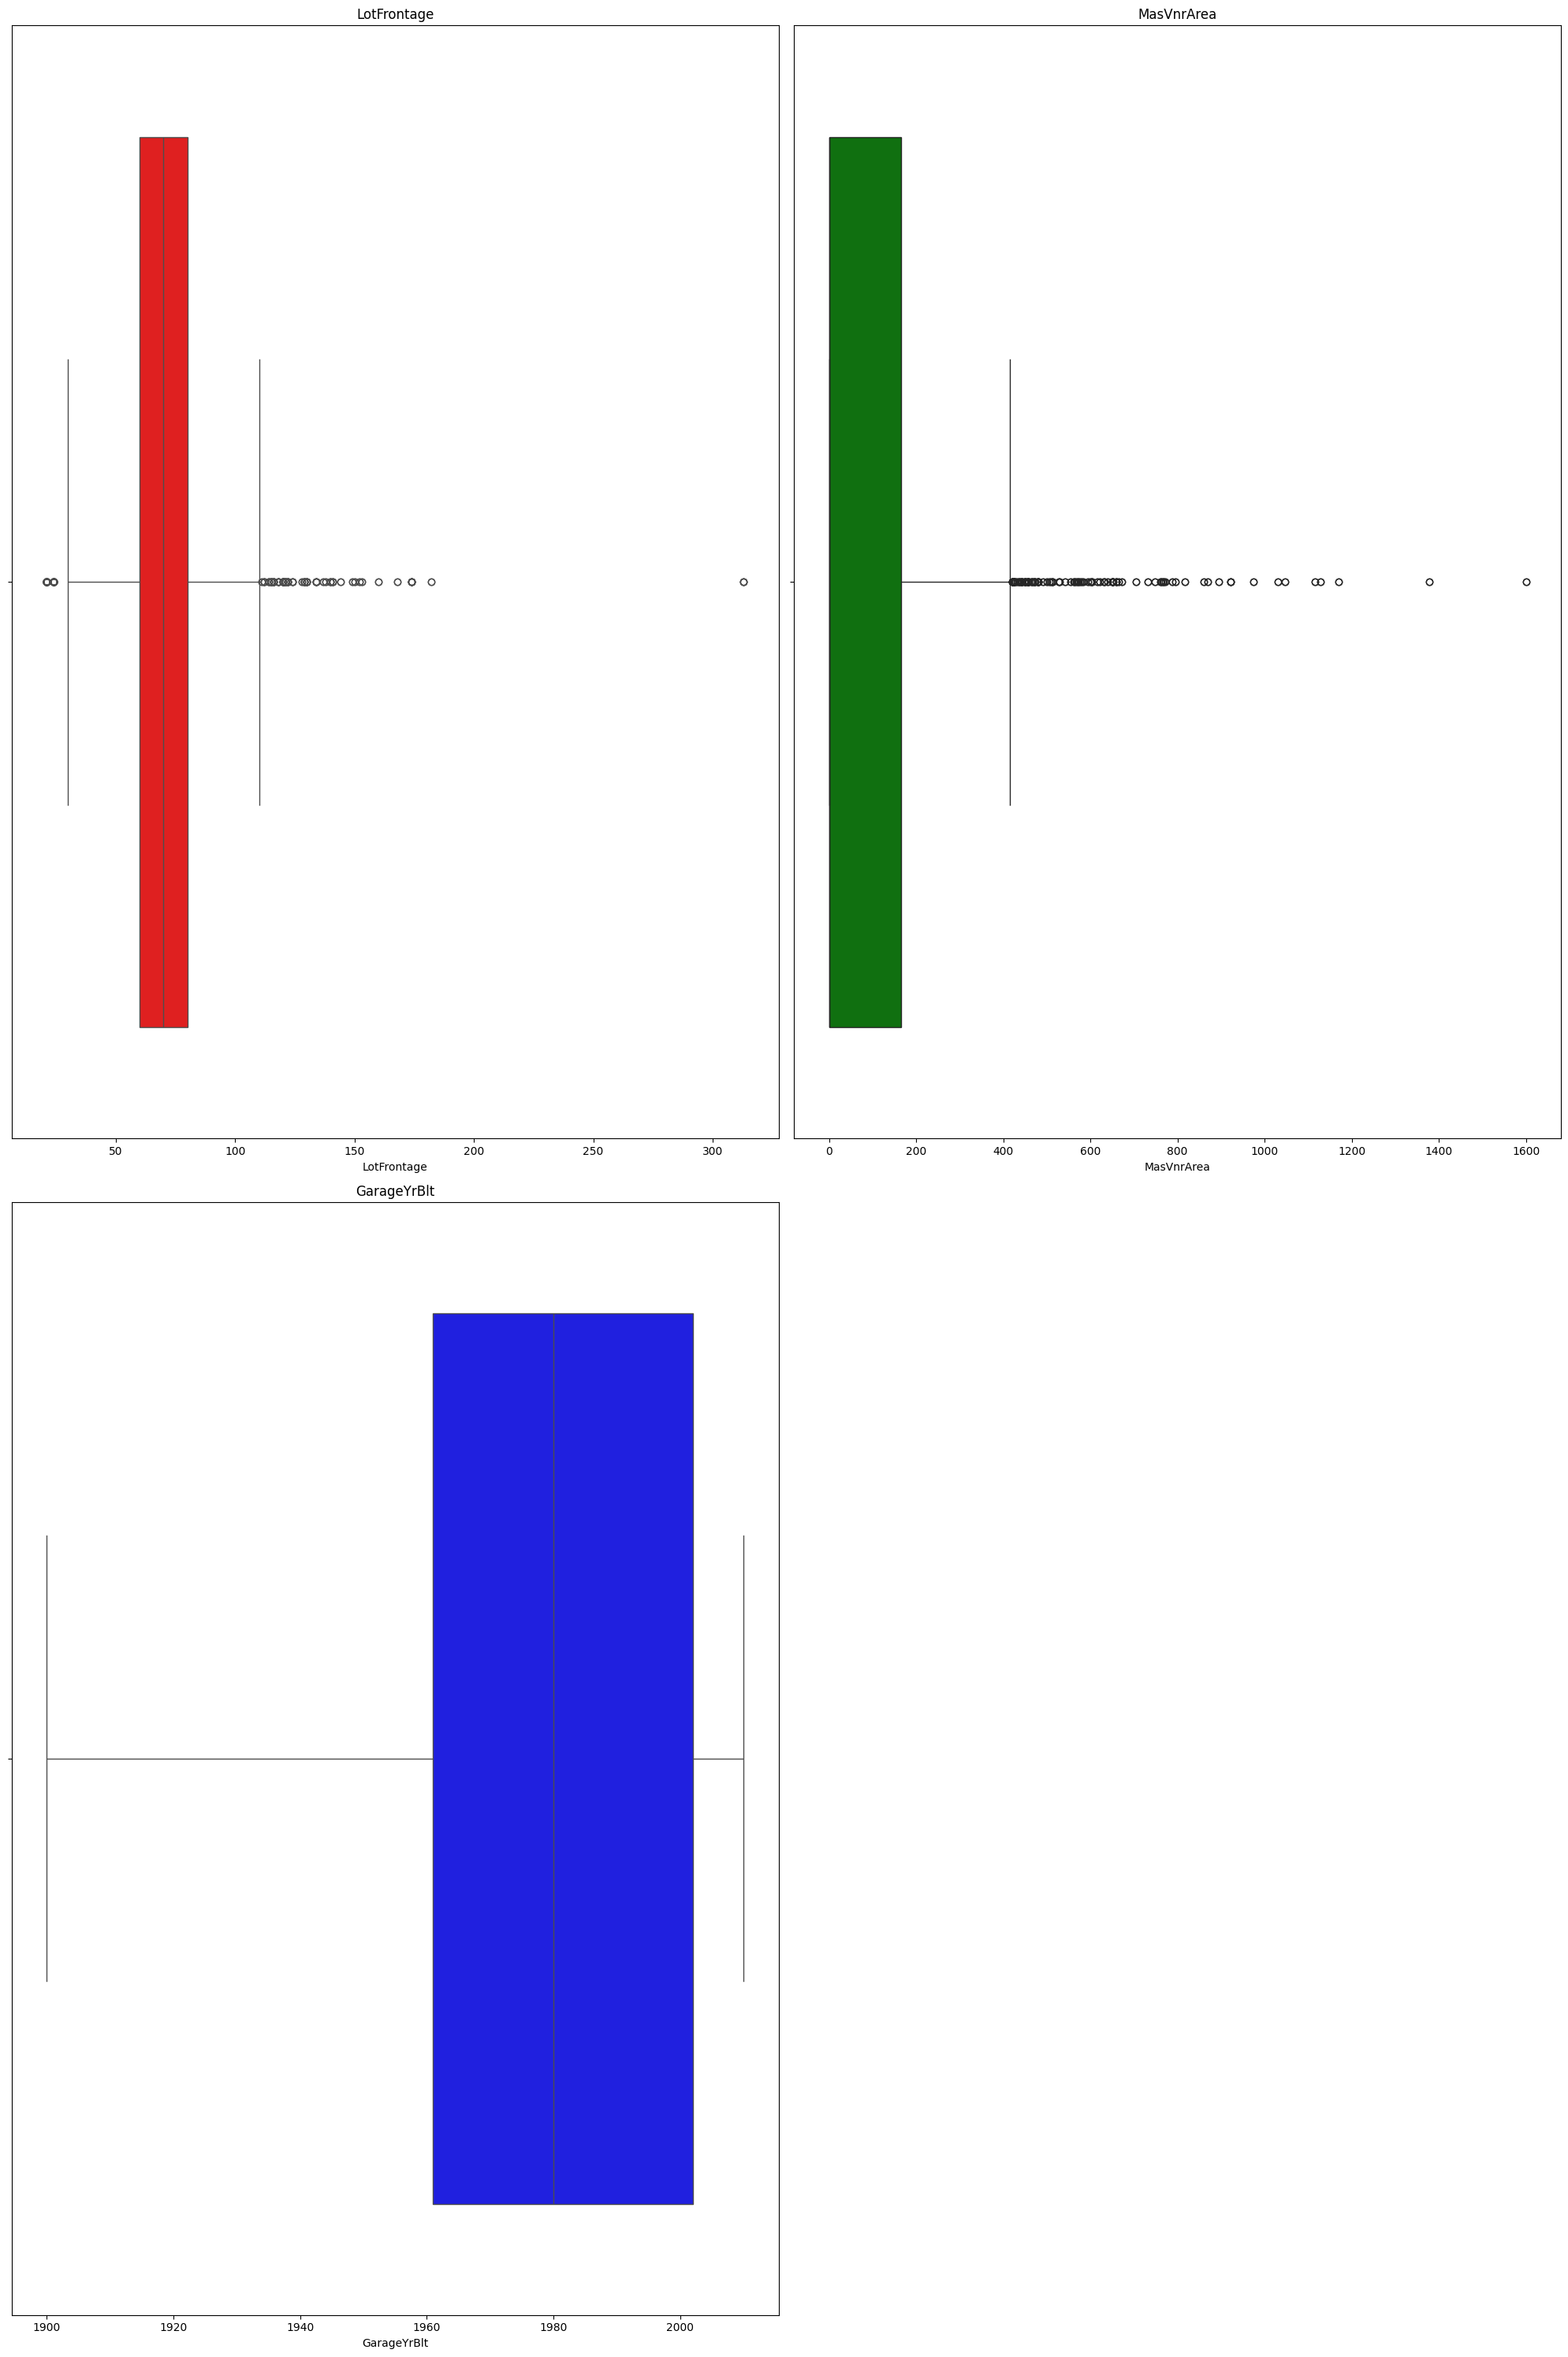

In [54]:
# create box plots for all numeric columns using for loop and subplot

plt.figure(figsize=(20, 30))

# Define colors and use itertools.cycle for dynamic cycling
colors = itertools.cycle(['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'magenta'])

for i, col in enumerate(numerical_missing_columns):
    plt.subplot((len(numerical_missing_columns) // 2) + 1, 2, i + 1)  # Adjust subplot grid size dynamically
    sns.boxplot(x=df[col], color=next(colors))  # Automatically pick the next color
    plt.title(col)

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [55]:
df["LotFrontage"].describe()

,LotFrontage
count,2920.000000
mean,70.372603
std,24.190991
min,21.000000
25%,60.000000
50%,70.000000
75%,80.000000
max,313.000000


In [56]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [57]:
df["BsmtFinSF2"].describe()

,BsmtFinSF2
count,2920.000000
mean,46.549315
std,161.291638
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1474.000000


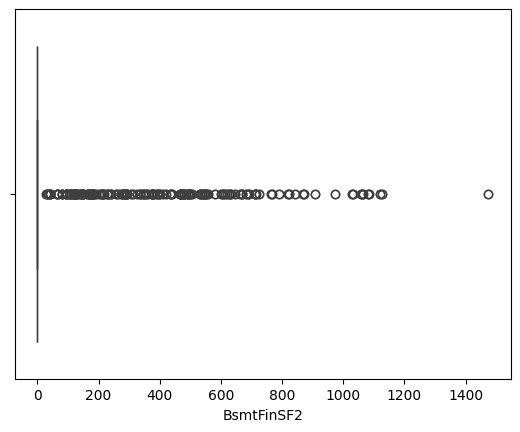

In [58]:
# plot the box plot col BsmtFinSF2
sns.boxplot(x=df["BsmtFinSF2"])
plt.xlabel("BsmtFinSF2")
plt.show()

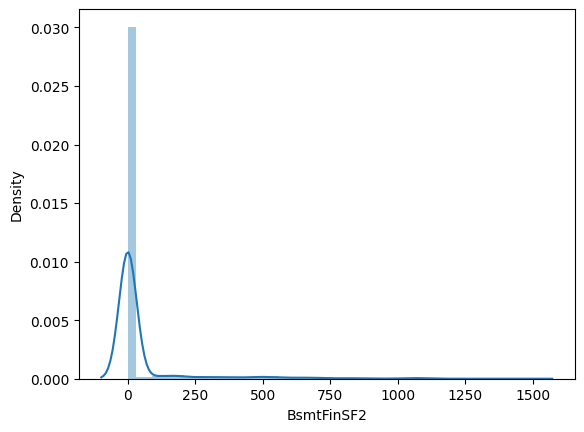

In [59]:
# plot dist plot col BsmtFinSF2 usong pyplot
sns.distplot(df["BsmtFinSF2"])
plt.xlabel("BsmtFinSF2")
plt.show()

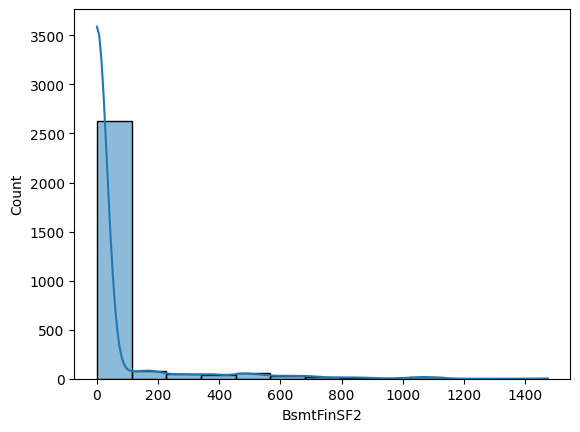

In [60]:
# draw a histogram to see the distribution of BsmtFinSF2  column
sns.histplot(df['BsmtFinSF2'], kde=True)
plt.xlabel("BsmtFinSF2")
plt.show()

Mean: 46.54931506849315
Median: 0.0
Mode: 0


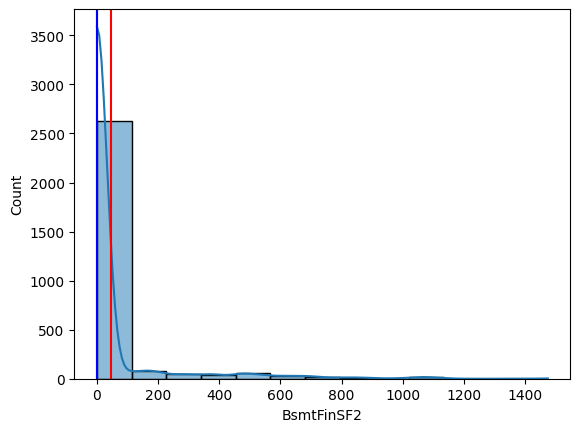

In [61]:
# plot the mean, median and mode of BsmtFinSF2 column using sns
sns.histplot(df['BsmtFinSF2'], kde=True)
plt.axvline(df['BsmtFinSF2'].mean(), color='red')
plt.axvline(df['BsmtFinSF2'].median(), color='green')
plt.axvline(df['BsmtFinSF2'].mode()[0], color='blue')

# print the value of mean, median and mode of BsmtFinSF2 column
print('Mean:', df['BsmtFinSF2'].mean())
print('Median:', df['BsmtFinSF2'].median())
print('Mode:', df['BsmtFinSF2'].mode()[0])

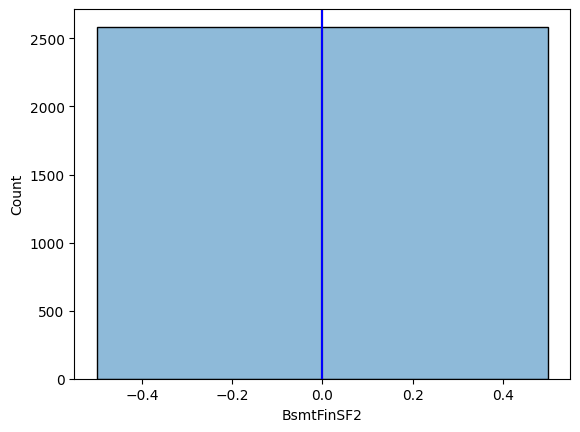

In [62]:
# Remove outlier using IQR
Q1 = df['BsmtFinSF2'].quantile(0.25)
Q3 = df['BsmtFinSF2'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['BsmtFinSF2'] >= lower_bound) & (df['BsmtFinSF2'] <= upper_bound)]

# plot the mean, median and mode of BsmtFinSF2 column using sns
sns.histplot(df['BsmtFinSF2'], kde=True)
plt.axvline(df['BsmtFinSF2'].mean(), color='red')
plt.axvline(df['BsmtFinSF2'].median(), color='green')
plt.axvline(df['BsmtFinSF2'].mode()[0], color='blue')

In [63]:
# select the all categorical columns
categorical_missing_columns = df.select_dtypes(include=['object']).columns.tolist()

In [64]:
# Lable encoding using LabelEncoder of all the categorical columns
label_encoder = LabelEncoder()
for col in categorical_missing_columns:
    df[col] = label_encoder.fit_transform(df[col])

In [65]:
# show the value of categorical columns
df[categorical_missing_columns].head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,3,1,3,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
1,3,1,3,3,0,2,0,24,1,2,...,4,3,5,1,1,4,4,2,8,4
2,3,1,0,3,0,4,0,5,2,2,...,4,2,5,1,1,4,4,2,8,4
3,3,1,0,3,0,0,0,6,2,2,...,4,2,5,5,2,4,4,2,8,0
4,3,1,0,3,0,2,0,15,2,2,...,4,2,5,1,1,4,4,2,8,4


In [66]:
# select the all numerical columns
numerical_missing_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
numerical_missing_columns

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch'

In [67]:
# Scaling using StandardScaler of all the numerical columns
scaler = StandardScaler()
df[numerical_missing_columns] = scaler.fit_transform(df[numerical_missing_columns])

In [68]:
df[numerical_missing_columns].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.052983,-0.03269,-0.231655,-0.229728,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-1.604798,0.147995,0.323215,0.191987,0.320644
1,-0.893576,-0.03269,0.383144,-0.076286,0.055706,0.741275,0.320799,0.0,-0.625920,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-0.496751,-0.605382,0.323215,0.191987,-0.011475
2,0.052983,-0.03269,-0.108695,0.143870,0.055706,-1.393400,0.320799,0.0,0.604976,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,0.980647,0.147995,0.323215,0.191987,0.505154
3,0.289623,-0.03269,-0.436588,-0.082957,0.055706,-1.393400,0.320799,0.0,-1.856815,-0.216598,...,4.340166,-0.11748,-0.260193,-0.055003,-0.080127,-1.604798,-1.358759,0.323215,-3.485638,-0.521954
4,0.052983,-0.03269,0.547091,0.545489,0.055706,-1.393400,0.320799,0.0,-0.625920,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,2.088694,0.147995,0.323215,0.191987,0.831123


In [69]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.052983,-0.03269,-0.231655,-0.229728,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-1.604798,0.147995,0.323215,0.191987,0.320644
1,-0.893576,-0.03269,0.383144,-0.076286,0.055706,0.741275,0.320799,0.0,-0.625920,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-0.496751,-0.605382,0.323215,0.191987,-0.011475
2,0.052983,-0.03269,-0.108695,0.143870,0.055706,-1.393400,0.320799,0.0,0.604976,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,0.980647,0.147995,0.323215,0.191987,0.505154
3,0.289623,-0.03269,-0.436588,-0.082957,0.055706,-1.393400,0.320799,0.0,-1.856815,-0.216598,...,4.340166,-0.11748,-0.260193,-0.055003,-0.080127,-1.604798,-1.358759,0.323215,-3.485638,-0.521954
4,0.052983,-0.03269,0.547091,0.545489,0.055706,-1.393400,0.320799,0.0,-0.625920,-0.216598,...,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,2.088694,0.147995,0.323215,0.191987,0.831123


In [70]:
# split the data into X and Y
X = df.drop("SalePrice", axis=1)
Y = df["SalePrice"]

In [71]:
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.052983,-0.032690,-0.231655,-0.229728,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,0.208310,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-1.604798,0.147995,0.323215,0.191987
1,-0.893576,-0.032690,0.383144,-0.076286,0.055706,0.741275,0.320799,0.0,-0.625920,-0.216598,...,-0.722361,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-0.496751,-0.605382,0.323215,0.191987
2,0.052983,-0.032690,-0.108695,0.143870,0.055706,-1.393400,0.320799,0.0,0.604976,-0.216598,...,-0.081571,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,0.980647,0.147995,0.323215,0.191987
3,0.289623,-0.032690,-0.436588,-0.082957,0.055706,-1.393400,0.320799,0.0,-1.856815,-0.216598,...,-0.188369,4.340166,-0.11748,-0.260193,-0.055003,-0.080127,-1.604798,-1.358759,0.323215,-3.485638
4,0.052983,-0.032690,0.547091,0.545489,0.055706,-1.393400,0.320799,0.0,-0.625920,-0.216598,...,0.559219,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,2.088694,0.147995,0.323215,0.191987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452,2.892662,1.476893,-0.190669,-0.866847,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,-0.295167,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,-0.496751,-1.358759,0.323215,0.191987
1453,-0.893576,-0.032690,1.940636,0.940035,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,0.132026,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,0.241948,-1.358759,0.323215,-3.485638
1454,-0.893576,-3.051856,-0.026722,-0.356485,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,1.001669,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,1.349996,0.901373,0.323215,0.191987
1455,0.052983,-0.032690,0.670050,-0.300845,0.055706,0.741275,0.320799,0.0,0.604976,-0.216598,...,-0.112085,-0.356913,-0.11748,-0.260193,-0.055003,-0.080127,0.611297,-0.605382,0.323215,0.191987


In [72]:
Y

,SalePrice
0,0.320644
1,-0.011475
2,0.505154
3,-0.521954
4,0.831123
...,...
1452,-0.460450
1453,-1.204642
1454,0.031578
1455,-0.091429


In [73]:
# Create a list of models to evaluate
models = [
    ('Linear Regression', LinearRegression()),
    ('Lasso Regression', Lasso()),
    ('Ridge Regression', Ridge()),
    ('Decision Tree', DecisionTreeRegressor()),
    ('Random Forest', RandomForestRegressor()),
    ('SVR', SVR()),
    ('XGBoost', XGBRegressor())
]

best_model = None
best_accuracy = 0.0

# Evaluate each model
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Perform cross-validation
    scores = cross_val_score(pipeline, X, Y, cv=5)

    # Calculate mean accuracy
    mean_accuracy = scores.mean()

    # Fit the pipeline on the training data
    pipeline.fit(X, Y)

    # Make predictions on the test data
    y_pred = pipeline.predict(X)

    # Calculate accuracy score (use a suitable metric, e.g., R^2 for regression)
    accuracy = model.score(X, Y)  # Using R^2 score for regression

    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# Print the best model and its accuracy
print("Best Accuracy:", best_accuracy)

Model: Linear Regression
Cross-validation Accuracy: 0.8249127294638141
Test Accuracy: 0.8390791798149531

Model: Lasso Regression
Cross-validation Accuracy: -0.0014377828662986759
Test Accuracy: 0.0

Model: Ridge Regression
Cross-validation Accuracy: 0.824937769969153
Test Accuracy: 0.8390791023260123

Model: Decision Tree
Cross-validation Accuracy: 1.0
Test Accuracy: 1.0

Model: Random Forest
Cross-validation Accuracy: 0.9813952452356629
Test Accuracy: 0.9973392285723343

Model: SVR
Cross-validation Accuracy: 0.9090853175761966
Test Accuracy: 0.9478191427344134

Model: XGBoost
Cross-validation Accuracy: 0.9994209811729624
Test Accuracy: 0.9998574084887258

Best Model: Pipeline(steps=[('model', DecisionTreeRegressor())])
Best Accuracy: 1.0


In [74]:
# report the best model
print("Best Model:", best_model)
print("Best Accuracy:", best_accuracy)

Best Model: Pipeline(steps=[('model', DecisionTreeRegressor())])
Best Accuracy: 1.0


In [75]:
# plot the best model
from sklearn.metrics import mean_squared_error, r2_score
y_pred = best_model.predict(X)
mse = mean_squared_error(Y, y_pred)
r2 = r2_score(Y, y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.0
R-squared: 1.0


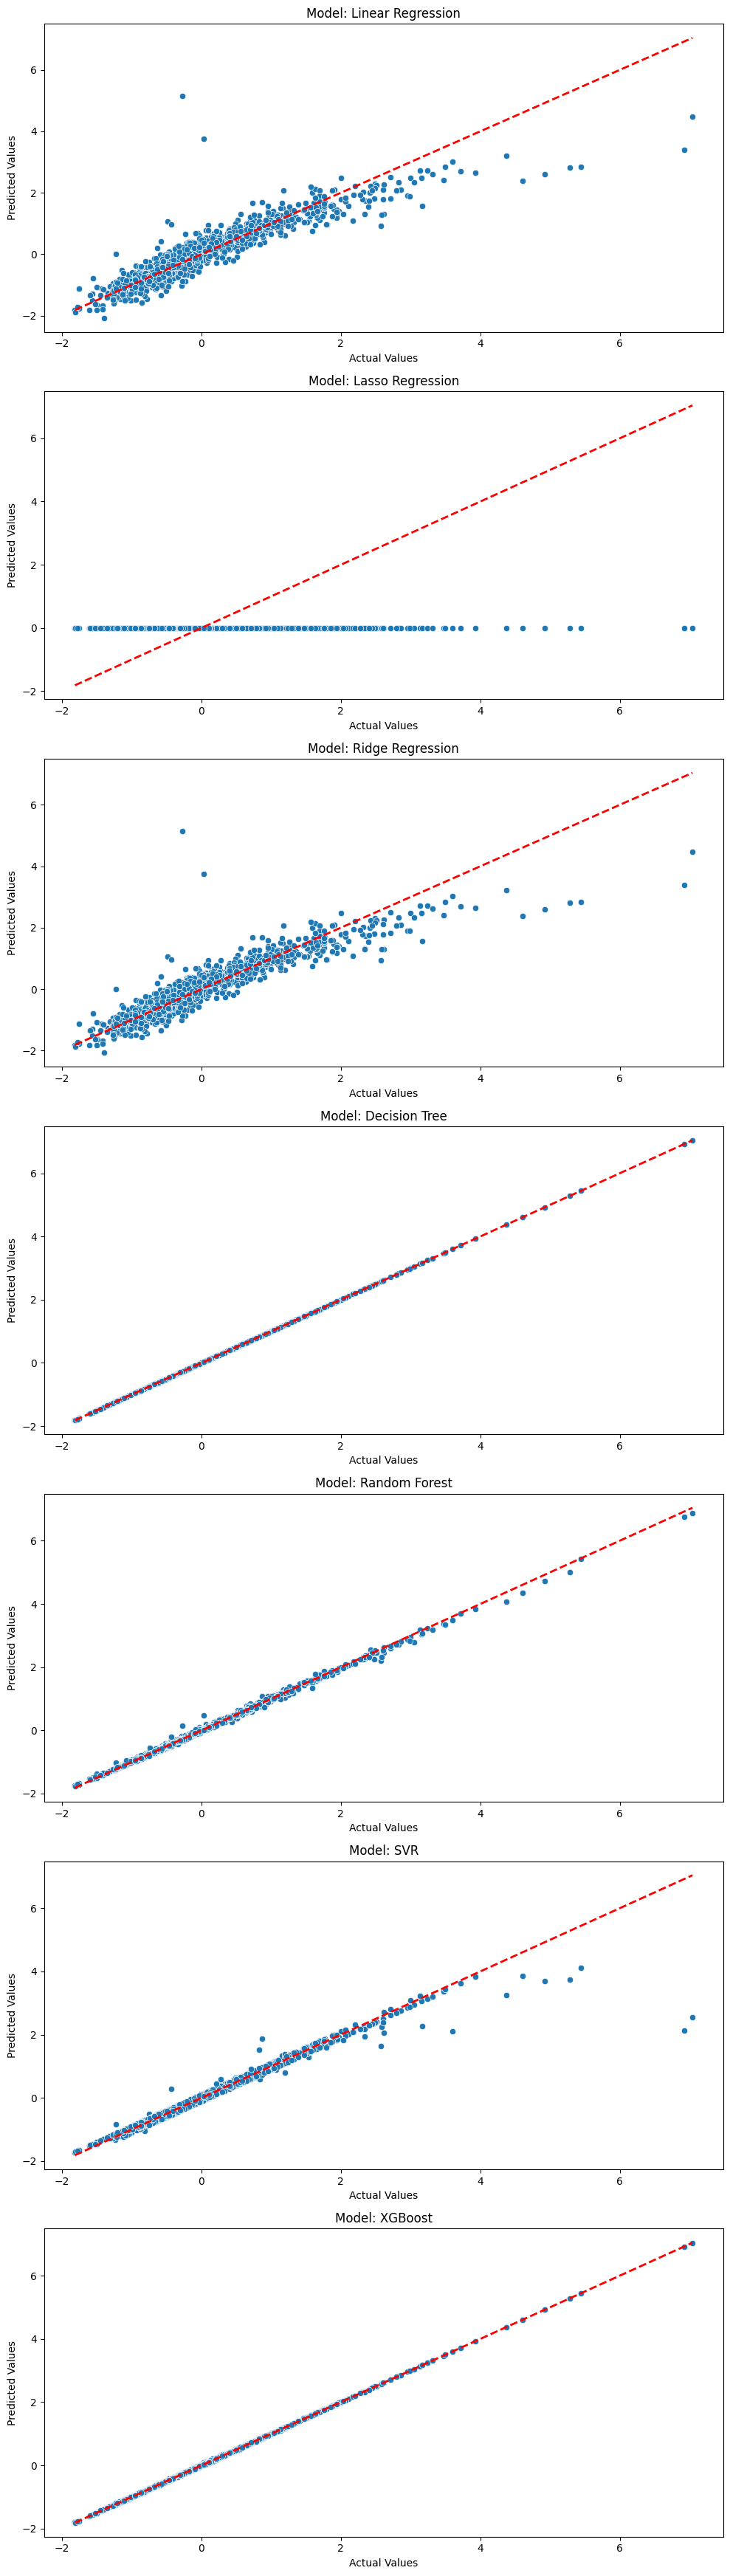

In [76]:
# plot the best model
import matplotlib.pyplot as plt
import seaborn as sns

# Create subplots for each model
fig, axs = plt.subplots(len(models), 1, figsize=(10, 5*len(models)))

for i, (name, model) in enumerate(models):
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('model', model)
    ])

    # Fit the pipeline on the training data
    pipeline.fit(X, Y)

    # Make predictions on the test data
    y_pred = pipeline.predict(X)

    # Plot actual vs predicted values
    sns.scatterplot(x=Y, y=y_pred, ax=axs[i])
    axs[i].plot([min(Y), max(Y)], [min(Y), max(Y)], color='red', linestyle='--', linewidth=2)  # Ideal line
    axs[i].set_title(f'Model: {name}')
    axs[i].set_xlabel('Actual Values')
    axs[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.show()

In [77]:
# Save the model
import joblib
joblib.dump(best_model, 'house_price_prediction_model.joblib')

['house_price_prediction_model.joblib']